In [1]:
# import sys
# !{sys.executable} -m pip install tabulate
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import glacierml as gl
import numpy as np
import warnings
from tensorflow.python.util import deprecation
import os
import logging
import seaborn as sns
import janitor
import tabulate
from tqdm import tqdm
tf.get_logger().setLevel(logging.ERROR)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
deprecation._PRINT_DEPRECATION_WARNINGS = False
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
# set definitions
Glam = gl.data_loader_2()
# ,TT,TTT,TTTx,TTT_full
# T_t = T.head()

# rename thickness column in database
gl.thickness_renamer(Glam)

# split data for training and validation
(train_features, test_features, train_labels, test_labels) = gl.data_splitter(Glam)

# define model hyperparameters
LR = np.logspace(-3,2,6)
vs = 0.2
VS = 0.1,0.15,0.2,0.25,0.3,0.35,0.4
RS = range(0,25,1)
ep = 300

# name databases
Glam.name = 'Glam'

In [3]:
# # set definitions
# glacier = gl.data_loader(pth = '/data/fast1/glacierml/T_models/')
# # ,TT,TTT,TTTx,TTT_full
# # T_t = T.head()

# # rename thickness column in database
# gl.thickness_renamer(glacier)

# # split data for training and validation
# (train_features, test_features, train_labels, test_labels) = gl.data_splitter(glacier)

# # define model hyperparameters
# LR = np.logspace(-3,2,6)
# vs = 0.2
# VS = 0.1,0.15,0.2,0.25,0.3,0.35,0.4
# RS = range(0,25,1)
# ep = 300

# # name databases
# glacier.name = 'glacier'
# # T_t.name = 'T_t'
# # TT.name = 'band'
# # TTT.name = 'point'
# # TTTx.name = 'TTTx'
# # TTT_full.name = 'TTT_full'

# # old definitions, legacy code.

# # arch = '16-8'
# # pth_mod = 'sm/sm_' + arch + '/'
# # pth_res = 'sr/sr_' + arch + '/'

In [4]:
"""
This cell contains code to evaluate models and make predictions, then display the zults
"""
rootdir = 'sm2/'
ext = ('.csv')
# print(rootdir)
dnn_model={}
predictions = pd.DataFrame()

for arch in tqdm(os.listdir(rootdir)):
    for folder in os.listdir(rootdir+arch):
        if 'MULTI' in folder and 'dnn' in folder:
            if '0.1' in folder:
                dnn_model[arch[3:]+'_'+folder] = tf.keras.models.load_model(rootdir 
                    + arch 
                    + '/' 
                    + folder)

                mae_test = dnn_model[arch[3:]+'_'+folder].evaluate(test_features,
                                                             test_labels,verbose=0)

                mae_train = dnn_model[arch[3:]+'_'+folder].evaluate(train_features,
                                             train_labels,verbose=0)

                pred_train = dnn_model[arch[3:]+'_'+folder].predict(train_features)

                pred_test = dnn_model[arch[3:]+'_'+folder].predict(test_features)
                avg_thickness = pd.Series((np.sum(pred_train) / len(pred_train)), name = 'avg train thickness')

                avg_test_thickness = pd.Series((np.sum(pred_test) / len(pred_test)),  name = 'avg test thickness')
                temp_df = pd.merge(avg_thickness, avg_test_thickness, right_index=True, left_index=True)
                predictions = predictions.append(temp_df, ignore_index=True)
                predictions.loc[predictions.index[-1], 'model']= folder
                predictions.loc[predictions.index[-1], 'test mae']= mae_test
                predictions.loc[predictions.index[-1], 'train mae']= mae_train
                predictions.loc[predictions.index[-1], 'architecture']= arch[3:]
                predictions.loc[predictions.index[-1], 'learning rate']= '0.1'
                predictions.loc[predictions.index[-1], 'validation split']= '0.2'

                
                
                
                
            if '0.01' in folder:
                dnn_model[arch[3:]+'_'+folder] = tf.keras.models.load_model(rootdir 
                    + arch 
                    + '/' 
                    + folder)

                mae_test = dnn_model[arch[3:]+'_'+folder].evaluate(test_features,
                                                             test_labels,verbose=0)

                mae_train = dnn_model[arch[3:]+'_'+folder].evaluate(train_features,
                                             train_labels,verbose=0)

                pred_train = dnn_model[arch[3:]+'_'+folder].predict(train_features)

                pred_test = dnn_model[arch[3:]+'_'+folder].predict(test_features)
                avg_thickness = pd.Series((np.sum(pred_train) / len(pred_train)), name = 'avg train thickness')

                avg_test_thickness = pd.Series((np.sum(pred_test) / len(pred_test)),  name = 'avg test thickness')
                temp_df = pd.merge(avg_thickness, avg_test_thickness, right_index=True, left_index=True)
                predictions = predictions.append(temp_df, ignore_index=True)
                predictions.loc[predictions.index[-1], 'model']= folder
                predictions.loc[predictions.index[-1], 'test mae']= mae_test
                predictions.loc[predictions.index[-1], 'train mae']= mae_train
                predictions.loc[predictions.index[-1], 'architecture']= arch[3:]
                predictions.loc[predictions.index[-1], 'learning rate']= '0.01'
                predictions.loc[predictions.index[-1], 'validation split']= '0.2'             
            
            
            if '0.001' in folder:
                dnn_model[arch[3:]+'_'+folder] = tf.keras.models.load_model(rootdir 
                    + arch 
                    + '/' 
                    + folder)

                mae_test = dnn_model[arch[3:]+'_'+folder].evaluate(test_features,
                                                             test_labels,verbose=0)

                mae_train = dnn_model[arch[3:]+'_'+folder].evaluate(train_features,
                                             train_labels,verbose=0)

                pred_train = dnn_model[arch[3:]+'_'+folder].predict(train_features)

                pred_test = dnn_model[arch[3:]+'_'+folder].predict(test_features)
                avg_thickness = pd.Series((np.sum(pred_train) / len(pred_train)), name = 'avg train thickness')

                avg_test_thickness = pd.Series((np.sum(pred_test) / len(pred_test)),  name = 'avg test thickness')
                temp_df = pd.merge(avg_thickness, avg_test_thickness, right_index=True, left_index=True)
                predictions = predictions.append(temp_df, ignore_index=True)
                predictions.loc[predictions.index[-1], 'model']= folder
                predictions.loc[predictions.index[-1], 'test mae']= mae_test
                predictions.loc[predictions.index[-1], 'train mae']= mae_train
                predictions.loc[predictions.index[-1], 'architecture']= arch[3:]            
                predictions.loc[predictions.index[-1], 'learning rate']= '0.001'
                predictions.loc[predictions.index[-1], 'validation split']= '0.2'                
                
                
                
                
predictions.rename(columns = {0:'avg train thickness'},inplace = True)

# these models are ridiculous, so we drop them.
idx = predictions.index[predictions['architecture']=='64']
predictions = predictions.drop(predictions.loc[idx].index)


100%|██████████| 5/5 [02:33<00:00, 30.65s/it]


In [5]:
predictions.sort_values('learning rate')

,avg train thickness,avg test thickness,model,test mae,train mae,architecture,learning rate,validation split
324,43.551074,46.056152,Glam_dnn_MULTI_0.001_0.2_300_24,18.787849,15.318938,8-4,0.001,0.2
141,43.985624,46.097133,Glam_dnn_MULTI_0.001_0.2_300_20,18.765877,14.632098,12-6,0.001,0.2
139,43.702991,45.506151,Glam_dnn_MULTI_0.001_0.2_300_19,19.138355,15.252684,12-6,0.001,0.2
137,45.317122,46.195120,Glam_dnn_MULTI_0.001_0.2_300_18,18.167248,14.464731,12-6,0.001,0.2
135,44.507243,45.761573,Glam_dnn_MULTI_0.001_0.2_300_17,18.176378,14.519562,12-6,0.001,0.2
...,...,...,...,...,...,...,...,...
166,70.369362,74.000520,Glam_dnn_MULTI_0.1_0.2_300_16,37.089745,30.887030,32-16-8,0.1,0.2
167,64.151450,66.064264,Glam_dnn_MULTI_0.1_0.2_300_17,31.388893,29.269640,32-16-8,0.1,0.2
168,50.053826,49.444013,Glam_dnn_MULTI_0.1_0.2_300_18,22.994038,20.510649,32-16-8,0.1,0.2
158,57.717129,59.013424,Glam_dnn_MULTI_0.1_0.2_300_8,34.116444,26.190723,32-16-8,0.1,0.2


In [6]:
"""
Here we compute for each layer architecture avg mae, mae std dev, and
prediction std dev.
"""
deviations = pd.DataFrame()
for architecture in list(predictions['architecture'].unique()):
    for learning_rate in list(predictions['learning rate'].unique()):
        # define temp dataframe for calculations that contains only one layer architecture
#         df = (predictions[predictions['architecture'] == architecture]) and (predictions[predictions['learning rate'] == str(learning_rate)])
        df = predictions[(predictions['architecture'] == architecture) & (predictions['learning rate' ]== learning_rate)]
#         break
#         print(df)
        # step 1: calculate mean of numbers
        test_mae_mean = np.sum(df['test mae']) / len(df) 

        diff_sq = pd.Series()

        for test_mae in df['test mae']:
            # step 2: subtract the mean from each, then square the result
            step_2 = pd.Series((test_mae - test_mae_mean)**2)
            diff_sq = diff_sq.append(step_2, ignore_index=True)

        # step 3: work out the mean of the squared differences    
        mean_diff_sq = (np.sum(diff_sq) / len(diff_sq))

        # step 4: take the square root
        test_mae_std_dev = np.sqrt(mean_diff_sq)


       # repeat for train mae 

        # step 1: calculate mean of numbers
        train_mae_mean = np.sum(df['train mae']) / len(df) 

        diff_sq = pd.Series()

        for train_mae in df['train mae']:
            # step 2: subtract the mean from each, then square the result
            step_2 = pd.Series((train_mae - train_mae_mean)**2)
            diff_sq = diff_sq.append(step_2, ignore_index=True)

        # step 3: work out the mean of the squared differences    
        mean_diff_sq = (np.sum(diff_sq) / len(diff_sq))

        # step 4: take the square root
        train_mae_std_dev = np.sqrt(mean_diff_sq)

        # repeat process for train thicknesses
        thickness_train_mean = np.sum(df['avg train thickness']) / len(df)   
        for thickness in df['avg train thickness']:
            step_2 = pd.Series((thickness - thickness_train_mean)**2)
            diff_sq = diff_sq.append(step_2, ignore_index=True)
        mean_diff_sq = (np.sum(diff_sq) / len(diff_sq))
        train_thickness_std_dev = np.sqrt(mean_diff_sq)


        # repeat process for test thicknesses
        thickness_test_mean = np.sum(df['avg test thickness']) / len(df)   
        for thickness in df['avg test thickness']:
            step_2 = pd.Series((thickness - thickness_test_mean)**2)
            diff_sq = diff_sq.append(step_2, ignore_index=True)
        mean_diff_sq = (np.sum(diff_sq) / len(diff_sq))
        test_thickness_std_dev = np.sqrt(mean_diff_sq)

        # turn the last number computed into a series so it may be appended to build the table.
        # it will be dropped later, no worries.
        test_thick_std_dev = pd.Series(test_thickness_std_dev)

        deviations = deviations.append(test_thick_std_dev, ignore_index=True)
        deviations.loc[deviations.index[-1], 'layer architecture']= architecture
        deviations.loc[deviations.index[-1], 'model parameters'] = dnn_model[architecture + '_Glam_dnn_MULTI_0.1_0.2_300_0'].count_params()
        deviations.loc[deviations.index[-1], 'learning rate']= learning_rate
        deviations.loc[deviations.index[-1], 'validation split']= 0.2
        deviations.loc[deviations.index[-1], 'test mae avg'] = test_mae_mean
        deviations.loc[deviations.index[-1], 'train mae avg']= train_mae_mean
        deviations.loc[deviations.index[-1], 'test mae std dev']= test_mae_std_dev
        deviations.loc[deviations.index[-1], 'train mae std dev']= train_mae_std_dev
        deviations.loc[deviations.index[-1], 'test predicted thickness std dev']= test_thickness_std_dev
        deviations.loc[deviations.index[-1], 'train predicted thickness std dev']= train_thickness_std_dev
# bootstrapped ensembles for predicted column    
#drop that appended line from earlier. Probably a better way to go about it
deviations.drop(columns = {0},inplace = True)    
deviations = deviations.dropna()
deviations.sort_values('test mae avg')


/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in double_scalars
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in double_scalars
/home/sa42/miniconda3/envs/python-cartopy-f/lib/p

,layer architecture,model parameters,learning rate,validation split,test mae avg,train mae avg,test mae std dev,train mae std dev,test predicted thickness std dev,train predicted thickness std dev
10,10-5,168.0,0.01,0.2,17.670566,12.744849,0.679880,0.843327,1.090071,0.905652
13,8-4,130.0,0.01,0.2,17.910783,12.918318,0.785507,0.642170,1.025227,0.909961
2,16-8,306.0,0.001,0.2,18.308924,14.548954,0.218444,0.280178,0.384305,0.353112
4,12-6,210.0,0.01,0.2,18.319959,12.050961,0.851422,1.096475,1.206124,1.028272
1,16-8,306.0,0.01,0.2,18.322421,11.700050,1.103773,0.861498,1.318387,0.962624
5,12-6,210.0,0.001,0.2,18.609337,14.747237,0.317896,0.245189,0.451783,0.419643
14,8-4,130.0,0.001,0.2,19.073664,15.294945,0.472922,0.339947,0.510901,0.426679
12,8-4,130.0,0.1,0.2,19.172529,12.488407,0.926528,0.721128,1.809043,1.479824
9,10-5,168.0,0.1,0.2,19.761633,12.292652,1.246131,1.633289,2.115127,1.789434
11,10-5,168.0,0.001,0.2,19.901357,16.242461,5.787727,6.078379,7.712083,7.255176


In [7]:
dnn_model['12-6_Glam_dnn_MULTI_0.01_0.2_300_0']

In [17]:
rootdir = '/data/fast1/glacierml/T_models/attribs/rgi60-attribs/'


RGI = pd.DataFrame()
for file in os.listdir(rootdir):
    print(file)
    f = pd.read_csv(rootdir+file, encoding_errors = 'replace', on_bad_lines = 'skip')
    RGI = RGI.append(f, ignore_index = True)

01_rgi60_Alaska.csv
02_rgi60_WesternCanadaUS.csv
03_rgi60_ArcticCanadaNorth.csv
04_rgi60_ArcticCanadaSouth.csv
05_rgi60_GreenlandPeriphery.csv
06_rgi60_Iceland.csv
07_rgi60_Svalbard.csv
08_rgi60_Scandinavia.csv
09_rgi60_RussianArctic.csv
10_rgi60_NorthAsia.csv
11_rgi60_CentralEurope.csv
12_rgi60_CaucasusMiddleEast.csv
13_rgi60_CentralAsia.csv
14_rgi60_SouthAsiaWest.csv
15_rgi60_SouthAsiaEast.csv
16_rgi60_LowLatitudes.csv
17_rgi60_SouthernAndes.csv
18_rgi60_NewZealand.csv
19_rgi60_AntarcticSubantarctic.csv


In [18]:
RGI = RGI[[
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Area',
    'Aspect'
]]
RGI

,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect
0,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346
1,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162
2,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175
3,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195
4,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181
...,...,...,...,...,...,...,...,...
216496,-53.9860,-37.7325,29.9,310,-999,510,0.042,315
216497,-54.8310,-36.1361,23.6,330,-999,830,0.567,200
216498,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308
216499,-68.8656,-90.4266,0.4,170,-999,270,0.011,122


In [19]:
test_pred = dnn_model['12-6_Glam_dnn_MULTI_0.01_0.2_300_0'].predict(RGI)

In [ ]:
test_pred.sum()

In [ ]:
predictions['model']

In [ ]:
pred_train = dnn_model['16-8_Glam_dnn_MULTI_0.1_0.2_300_0'].predict(train_features)

In [ ]:
Glam

In [ ]:
pred_test

In [ ]:
deviations.sort_values('test mae avg')

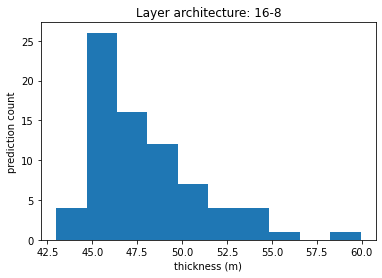

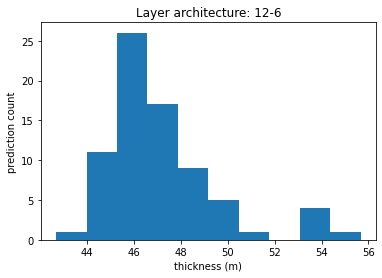

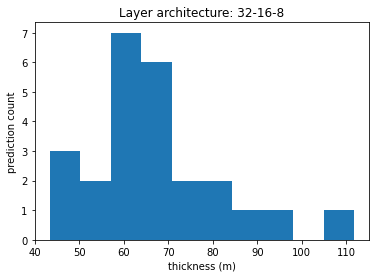

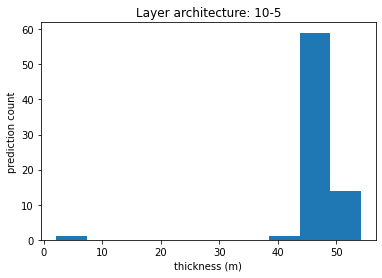

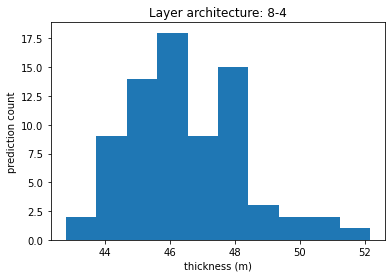

In [20]:
"""
This cell contains code to produce histograms of all the architectures different histories
"""

for architecture in list(predictions['architecture'].unique()):
    df = predictions[predictions['architecture'] == architecture]
    fig,ax = plt.subplots()
    ax.set_title('Layer architecture: ' + architecture)
    ax.set_ylabel('prediction count')
    ax.set_xlabel('thickness (m)')
    fig.patch.set_facecolor('w')
    plt.hist(df['avg test thickness'])
# print(df)

In [ ]:
df

In [ ]:
ccccombo_breaker()
# past this point is under construction. 
# here be monsters

In [21]:
# load all histories
print('Loading histories....')
rootdir = 'sr2/'
dnn_history = {}
for arch in tqdm(os.listdir(rootdir)):
    for folder in os.listdir(rootdir+arch):
        if 'MULTI' in folder:
            if 'dnn' in folder:

                dnn_history[arch[3:] + '_'+ folder] = pd.read_csv(rootdir+arch+'/'+folder)
# dnn_history

Loading histories....


100%|██████████| 5/5 [00:00<00:00, 15.98it/s]


In [ ]:
dnn_history

In [ ]:
"""
This code plots predictions against actual thickness. Not currently modified and will load
EVERY SINGLE MODEL. DO NOT USE JUST YET
"""
# for modl in dnn_modl:    
#     y = dnn_modl[modl].predict(test_features)
#     fig,ax=plt.subplots(1,1,figsize=(15,10))
#     fig.patch.set_facecolor('w')
#     plt.plot(test_labels,y,'.')
#     plt.plot((0,300),(0,300),'-')
#     plt.xlabel('True Thickness (m)')
#     plt.ylabel('Model Thickness (m)')
#     plt.xlim((0,300))
#     plt.ylim((0,300))
#     # plt.savefig("/home/sa42/notebooks/glac/figs/GTP_T")

In [ ]:
"""
This is a density plot of the most recent predictions made. Can easily be modified in a loop
to show multiple random states and whatnot
"""
sns.set(rc={"figure.figsize":(15,10)})
sns.kdeplot(x = test_labels, y = y.flatten(),fill = True)
plt.plot((0,300),(0,300),'-')

In [ ]:
"""
This cell plots the different variable loss curves to show individual variable models
Not currently working because we have only loaded dnn_MULTI models
"""
fig,ax=plt.subplots(2,2,figsize=(10,10))
fig.patch.set_facecolor('w')
# ax.set_ylim([5,30])

# gl.plot_loss(dnn_history['T_MULTI'])
for i, variable_name in enumerate(list(train_features)):
    ax = plt.subplot(2,2,i+1)
    gl.plot_loss(dnn_history['glacier_'+ variable_name+ '_0.1_0.2_300_6'])
#     ax.set_ylim([35,140])
    ax.set_title(variable_name)
    plt.tight_layout()
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP1_dnn_loss.eps")


In [ ]:
deviations.sort_values('test mae avg')


In [ ]:
dnn_history

In [ ]:
qqq.iloc[0]

In [ ]:
# # load all histories
# qqq = deviations.sort_values('test mae avg')


for rs in RS:
#     dnn_histor+y[qqq['layer architecture']+
#                 'Glam_dnn_history_MULTI_'+
#                 qqq['learning rate']+
#                 '_0.2_300_'+
#                 rs]
    gl.plot_loss(dnn_history[qqq['layer architecture'].iloc[0]+
                '_Glam_dnn_history_MULTI_'+
                qqq['learning rate'].iloc[0]+
                '_0.2_300_'+
                str(rs)])
# print('Loading histories....')
# rootdir = 'sr2/'
# dnn_history = {}
# for arch in tqdm(os.listdir(rootdir)):
#     for folder in os.listdir(rootdir+arch):
#         if 'MULTI' in folder and 'dnn' in folder:

#             dnn_history[arch[3:] + '_'+ folder] = pd.read_csv(rootdir+arch+'/'+folder)
# dnn_history

In [ ]:

[qqq['layer architecture'].iloc[0]+
                    '_Glam_dnn_history_MULTI_'+
                    qqq['learning rate'].iloc[0]+
                    '_0.2_300_'+
                    str(rs)]

In [ ]:
"""
This cell plots each random state loss curve for the 25 random states for each run
Also loads EVERY SINGLE MODEL currently and blows up the memory. Working on it.
"""
# for rs in RS:
for hist in dnn_history:    
    fig,ax=plt.subplots(1,1,figsize=(10,10))
    fig.patch.set_facecolor('w')
    ax.set_title(hist)
    gl.plot_loss(dnn_history[hist])
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP_dnn_loss.eps")

In [ ]:
# def plot_single_variable(x,y,model_type,model_name,feature_name):
#     y = model_type[model_name].predict(test_labels)
#     plt.scatter(train_features[feature_name], train_labels, label='Data')
#     plt.plot(x, y,'.', color='k', label='Predictions')
#     plt.xlabel(feature_name)
#     plt.ylabel('THICKNESS')
#     plt.legend()
#     plt.plot()

# x = test_labels
# for i, variable_name in enumerate(list(train_features)):
#     ax = plt.subplot(2,2,i+1)
#     model_name = (dataset.name 
#     + '_' 
#     + variable_name 
#     + '_' 
#     + str(lr) 
#     + '_' 
#     + str(vs) 
#     + '_' 
#     + str(ep))
#     plot_single_variable(x,y,dnn_model, model_name,variable_name)
# #     ax.set_ylim([35,140])
# #     ax.set_title(variable_name)
# #     plt.savefig("/home/sa42/notebooks/glac/figs/GTP1_dnn_loss.eps")
# plt.tight_layout()

In [ ]:
# """
# This cell contains code to load models and histories.
# """

# # fix hyperparameters 
# lr = 0.1
# vs = 0.2
# # load models
# print('Loading models....')

# linear_model = {}
# dnn_model = {}
# # data is already split, however if other databases are used, then this line is needed
# # (train_features, test_features, train_labels, test_labels) = gl.data_splitter(glacier)
# for variable_name in tqdm(list(train_features) + ['MULTI']):
#     for rs in RS:
#         file_name = (
#         pth_mod 
#         + 'glacier' 
#         + '_linear_' 
#         + variable_name 
#         + '_' 
#         + str(lr)
#         + '_'
#         + str(vs)
#         + '_'
#         + str(ep)
#         + '_'
#         + str(rs)
#         )

#         linear_model[
#             'glacier' 
#             + '_' 
#             + variable_name 
#             + '_' 
#             + str(lr)
#             + '_'
#             + str(vs)
#             + '_'
#             + str(ep)
#             + '_'
#             + str(rs)
#         ] = tf.keras.models.load_model(file_name)
        
# for variable_name in tqdm(list(train_features) + ['MULTI']):
#     for rs in RS:
#         file_name = (
#         pth_mod 
#         + 'glacier' 
#         + '_dnn_' 
#         + variable_name 
#         + '_' 
#         + str(lr)
#         + '_'
#         + str(vs)
#         + '_'
#         + str(ep)
#         + '_'
#         + str(rs)
#         )

#         dnn_model[
#             'glacier'
#             + '_' 
#             + variable_name 
#             + '_' 
#             + str(lr)
#             + '_'
#             + str(vs)
#             + '_'
#             + str(ep)
#             + '_'
#             + str(rs)
#         ] = tf.keras.models.load_model(file_name)
# print('Models loaded')

# # load all histories
# print('Loading histories....')
# linear_history = {}
# dnn_history = {}
# for variable_name in tqdm(list(train_features) + ['MULTI']):
#     for rs in RS:
#         file_name = (
#             pth_res 
#             + 'glacier' 
#             +'_linear_history_'
#             + variable_name 
#             + '_' 
#             + str(lr)
#             + '_'
#             + str(vs)
#             + '_'
#             + str(ep)
#             + '_'
#             + str(rs)
#         )

#         linear_history[
#             'glacier' 
#             +'_'
#             + variable_name 
#             + '_' 
#             + str(lr)
#             + '_'
#             + str(vs)
#             + '_'
#             + str(ep)
#             + '_'
#             + str(rs)
#         ]= pd.read_csv(file_name)

# for variable_name in tqdm(list(train_features) + ['MULTI']):
#     for rs in RS:
#         file_name = (
#             pth_res 
#             + 'glacier_dnn_history_' 
#             + variable_name 
#             + '_' 
#             + str(lr)
#             + '_'
#             + str(vs)
#             + '_'
#             + str(ep)
#             + '_'
#             + str(rs)
#         )

#         dnn_history[
#             'glacier' 
#             +'_'
#             + variable_name 
#             + '_' 
#             + str(lr)
#             + '_'
#             + str(vs)
#             + '_'
#             + str(ep)
#             + '_'
#             + str(rs)
#         ] = pd.read_csv(file_name)
# print('Histories loaded')

In [ ]:

"""
This cell loads the loss histories from the original model with one dense layer of 64 nodes.
From these histories I extracted the lowest and final loss value and plotted them.
First is plotted the loss from using different learning rates with a fixed validation split. 
Then follows a plot of different validation splits using a fixed learning rate.
"""

# set up dictionaries
loss = {}
dnn_lr_history = {}
loss['glacier_min_learn'] = pd.DataFrame()
loss['glacier_fin_learn'] = pd.DataFrame()

# loop to define and then load histories
for lr in LR:
    file_name = (
    'sr/sr_64/'
    + 'glacier_dnn_history_MULTI_'
    + str(lr)
    + '_'
    + str(vs)
    + '_'
    + str(ep))
    
    file = (
    'glacier_MULTI_'
    + str(lr)
    + '_'
    + str(vs)
    + '_'
    + str(ep))
    
    
    
    dnn_lr_history[
    'glacier_MULTI_' 
    + str(lr)
    + '_'
    + str(vs)
    + '_'
    + str(ep)
    ] = pd.read_csv(file_name)
    
    # find minimum and insert other model hyperparameters into table
    m_loss = dnn_lr_history[file].min()
    m_loss['learning rate'] = str(lr)
    m_loss['validation split'] = str(vs)
    m_loss['epochs'] = str(ep)
    loss['glacier_min_learn'] = loss['glacier_min_learn'].append(m_loss,ignore_index=True)
    
    
    # find final and insert other model hyperparameters into table
    f = dnn_lr_history[file].last_valid_index()
    f_loss = dnn_lr_history[file].iloc[[f]]
    f_loss['learning rate'] = str(lr)
    f_loss['validation split'] = str(vs)
    f_loss['epochs'] = str(ep)

    loss['glacier_fin_learn'] = loss['glacier_fin_learn'].append(f_loss,ignore_index=True)

loss['glacier_fin_learn'] = loss['glacier_fin_learn'].rename(columns = {
    'loss':'loss_final',
    'val_loss':'val_loss_final'
})

loss['glacier_min_learn'] = loss['glacier_min_learn'].rename(columns = {
    'loss':'loss_minimum',
    'val_loss':'val_loss_minimum'
})
    
print('Results compiled')
sns.set(rc={"figure.figsize":(15,10)})
ax = plt.gca()
ax.set_ylim([5,30])
# loss['glacier_min'].plot(x='validation split', y = ['loss_minimum', 'val_loss_minimum'], kind='bar',  ax=ax)
# loss['glacier_fin'].plot(x='validation split', y = ['loss_final', 'val_loss_final'], kind='bar',  ax=ax)

loss['glacier_fin_learn'].plot(x='learning rate', y = 'loss_final',color = 'blue',  ax=ax)
loss['glacier_fin_learn'].plot(x='learning rate', y = 'val_loss_final',color = 'green', ax=ax)
loss['glacier_min_learn'].plot(x='learning rate', y = 'loss_minimum', color = 'red', ax=ax)
loss['glacier_min_learn'].plot(x='learning rate', y = 'val_loss_minimum',color = 'orange', ax=ax)
ax.set_xlabel('Learning rate at fixed validation split = 0.2')
ax.set_ylabel('Mean Absolute Error')
ax.set_title('GlaThiDa Glacier scale dataset multivariable regression hyperparameterization')
plt.show()
plt.tight_layout()



# repeat above loop with fixed lr and varied vs
lr = 0.1
loss = {}
dnn_vs_history = {}
loss['glacier_min_valsplit'] = pd.DataFrame()
loss['glacier_fin_valsplit'] = pd.DataFrame()
for vs in VS:
    file_name = (
    'sr/sr_64/'
    + 'glacier_dnn_history_MULTI_'
    + str(lr)
    + '_'
    + str(vs)
    + '_'
    + str(ep))
    
    file = (
    'glacier_MULTI_'
    + str(lr)
    + '_'
    + str(vs)
    + '_'
    + str(ep))
    
    
    
    dnn_lr_history[
    'glacier_MULTI_' 
    + str(lr)
    + '_'
    + str(vs)
    + '_'
    + str(ep)
    ] = pd.read_csv(file_name)
    
    
    m_loss = dnn_lr_history[file].min()
    m_loss['learning rate'] = str(lr)
    m_loss['validation split'] = str(vs)
    m_loss['epochs'] = str(ep)
    loss['glacier_min_valsplit'] = loss['glacier_min_valsplit'].append(m_loss,ignore_index=True)

    f = dnn_lr_history[file].last_valid_index()
    f_loss = dnn_lr_history[file].iloc[[f]]
    f_loss['learning rate'] = str(lr)
    f_loss['validation split'] = str(vs)
    f_loss['epochs'] = str(ep)

    loss['glacier_fin_valsplit'] = loss['glacier_fin_valsplit'].append(f_loss,ignore_index=True)

loss['glacier_fin_valsplit'] = loss['glacier_fin_valsplit'].rename(columns = {
    'loss':'loss_final',
    'val_loss':'val_loss_final'
})

loss['glacier_min_valsplit'] = loss['glacier_min_valsplit'].rename(columns = {
    'loss':'loss_minimum',
    'val_loss':'val_loss_minimum'
})
    
print('Results compiled')
sns.set(rc={"figure.figsize":(15,10)})
ax = plt.gca()
ax.set_ylim([5,30])
# loss['glacier_min'].plot(x='validation split', y = ['loss_minimum', 'val_loss_minimum'], kind='bar',  ax=ax)
# loss['glacier_fin'].plot(x='validation split', y = ['loss_final', 'val_loss_final'], kind='bar',  ax=ax)

loss['glacier_fin_valsplit'].plot(x='validation split', y = 'loss_final',color = 'blue',  ax=ax)
loss['glacier_fin_valsplit'].plot(x='validation split', y = 'val_loss_final',color = 'green', ax=ax)
loss['glacier_min_valsplit'].plot(x='validation split', y = 'loss_minimum', color = 'red', ax=ax)
loss['glacier_min_valsplit'].plot(x='validation split', y = 'val_loss_minimum',color = 'orange', ax=ax)
ax.set_xlabel('Validation splits with learning rate = 0.1')
ax.set_ylabel('Mean Absolute Error')
ax.set_title('GlaThiDa Glacier scale dataset multivariable regression hyperparameterization')
plt.show()
plt.tight_layout()

In [ ]:
"""
This cell computes the true average thickness of the glaciers in use
"""


pth = '/data/fast1/glacierml/T_models/'
T_lab = pd.read_csv(pth + 'T.csv', low_memory = False)
T_lab = T_lab[[
    'GlaThiDa_ID',
    'LAT',
    'LON',
    'AREA',
    'MEAN_SLOPE',
    'MEAN_THICKNESS'
]]
T_lab = T_lab.dropna()

tru_thickness = np.sum(T_lab['MEAN_THICKNESS']) / len(T_lab['MEAN_THICKNESS'])
tru_thickness